In [49]:
import pandas as pd
import numpy as np
df = pd.read_csv("/workspaces/H05_Veri_Analizi_EDA/winemag-data-130k-v2_indexfixed.csv").drop(columns=["Unnamed: 0"])
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Veri Setinden veri çekmeyi ve filtrelemeyi öğrendik ama veriler coğu zaman doğru formatta çıkmaz. Bazen elimizdeki verileri biçimlendirmek gerekir.

In [ ]:
# df = df.drop(columns=["Unnamed: 0"])
# df.columns
# df.to_csv("winemag-data-130k-v2_indexfixed.csv",index=False)

In [51]:
##### Summary Functions

#df.describe() --> veri seti hakkında istatistiksel özetler verir. Bu yüzden önce verileri ayırmalıyım.

df_numeric = df.select_dtypes(include=["int64","Float64"])
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
points,129971.0,88.447138,3.039730,80.0,86.0,88.0,91.0,100.0
price,120975.0,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0


In [ ]:
df_object = df.select_dtypes(include=["object"])
df_object.describe().T

,count,unique,top,freq
country,129908,43,US,54504
description,129971,119955,"Gravenstein apple, honeysuckle and jasmine aro...",3
designation,92506,37979,Reserve,2009
province,129908,425,California,36247
region_1,108724,1229,Napa Valley,4480
region_2,50511,17,Central Coast,11065
taster_name,103727,19,Roger Voss,25514
taster_twitter_handle,98758,15,@vossroger,25514
title,129971,118840,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11
variety,129970,707,Pinot Noir,13272


In [ ]:
df["price"].max(),df["points"].mean(),df["taster_name"].unique(),df["taster_name"].nunique()

(np.float64(3300.0),
 np.float64(88.44713820775404),
 array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
        'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
        'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
        'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
        'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
        'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
        'Christina Pickard'], dtype=object))

In [45]:
# MAP ve APPLY Islemleri

# df.map() --> Bir değer kümesini başka bir değer kümesiyle eşleme işlemi yapmaktadır. Mevcut verilerden sıklıkla yeni veriler/gösterimler oluşturulmaya veya verilerin var olan formatlarını(tiplerini) değiştirerek yeni bir formata dönüştürmeye ihtiyaç duyulur.

points_mean = df.points.mean()
df["points"].map(lambda x: x-points_mean)

df[["points","price"]].apply(lambda x : x-points_mean)


# df.apply() --> 

def remainPoints(df):
    df.points = df.points- points_mean
    return df

df.apply(remainPoints)


AttributeError: 'Series' object has no attribute 'points'

In [ ]:
03_Pandas_Data_types_and_Missing_Values.ipynb

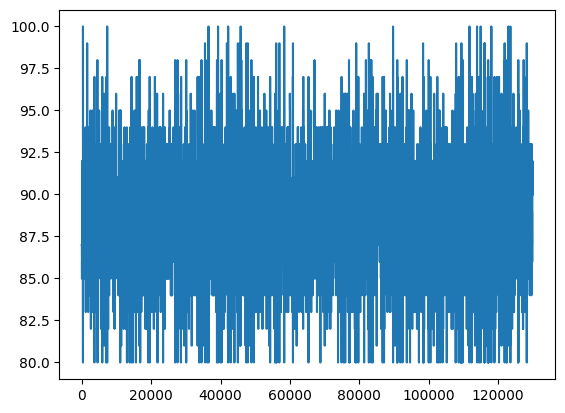

In [22]:
import matplotlib.pyplot as plt

plt.plot(df_numeric["points"])
plt.show()